# Plot cutflows

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.3)
cm = plt.colormaps['RdYlBu']

### Load ATLAS Recast Data

In [2]:
files = {
    'ATLAS-SUSY-2016-08' : {
                                 '1j, qcut = 65' : './pp2BB1j_atlas/Events/run_01/cdfo_324_300.0_tau_7e-02_atlas_2016_08_cutflow.pcl',
                                 '1j, qcut = 150' : './pp2BB1j_atlas/Events/run_02/cdfo_324_300.0_tau_7e-02_atlas_2016_08_cutflow.pcl',
                                 '2j, qcut = 30' : './pp2BB2j_atlas/Events/run_01/cdfo_324_300.0_tau_7e-02_atlas_2016_08_cutflow.pcl',
                                # '2j, qcut = 100' : './pp2BB2j_atlas/Events/run_02/cdfo_324_300.0_tau_7e-02_atlas_2016_08_cutflow.pcl',
                                '2j, qcut = 150' : './pp2BB2j_atlas/Events/run_03/cdfo_324_300.0_tau_7e-02_atlas_2016_08_cutflow.pcl',
                                 '0j, qcut = 30' : './pp2BB0j_atlas/Events/run_01/cdfo_324_300.0_tau_7e-02_atlas_2016_08_cutflow.pcl',
                                 '0j, qcut = 150' : './pp2BB0j_atlas/Events/run_03/cdfo_324_300.0_tau_7e-02_atlas_2016_08_cutflow.pcl',
                            },
        'ATLAS-SUSY-2018-13' : {'1j, qcut = 65' : './pp2BB1j_atlas/Events/run_01/cdfo_324_300.0_tau_7e-02_atlas_2018_13_cutflow.pcl',
                                 '1j, qcut = 150' : './pp2BB1j_atlas/Events/run_02/cdfo_324_300.0_tau_7e-02_atlas_2018_13_cutflow.pcl',
                                 '2j, qcut = 30' : './pp2BB2j_atlas/Events/run_01/cdfo_324_300.0_tau_7e-02_atlas_2018_13_cutflow.pcl',
                                # '2j, qcut = 100' : './pp2BB2j_atlas/Events/run_02/cdfo_324_300.0_tau_7e-02_atlas_2018_13_cutflow.pcl',
                                 '2j, qcut = 150' : './pp2BB2j_atlas/Events/run_03/cdfo_324_300.0_tau_7e-02_atlas_2018_13_cutflow.pcl',
                                '0j, qcut = 30' : './pp2BB0j_atlas/Events/run_01/cdfo_324_300.0_tau_7e-02_atlas_2018_13_cutflow.pcl',
                                 '0j, qcut = 150' : './pp2BB0j_atlas/Events/run_03/cdfo_324_300.0_tau_7e-02_atlas_2018_13_cutflow.pcl'
                               }         
        }

recastDataDict = {label : {l : pd.read_pickle(f) for l,f in files[label].items()} for label in files}

### Get Model parameters

In [3]:
msb = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'
modelDict = {msb : 324.0, mn1 : 300., tau : 0.07}
title = r'$m_{Y} = %1.0f$ GeV, $m_{\tilde \chi_1^0} = %1.0f$ GeV, $\tau = %1.2f$ ns'%(modelDict['mLLP'],modelDict['mLSP'],modelDict['tau_ns'])
figlabel = 'msb_%1.0f_mchi_%1.0f_tau_%1.2f'%(modelDict['mLLP'],modelDict['mLSP'],modelDict['tau_ns'])

### Plot cutflow for ATLAS analyses

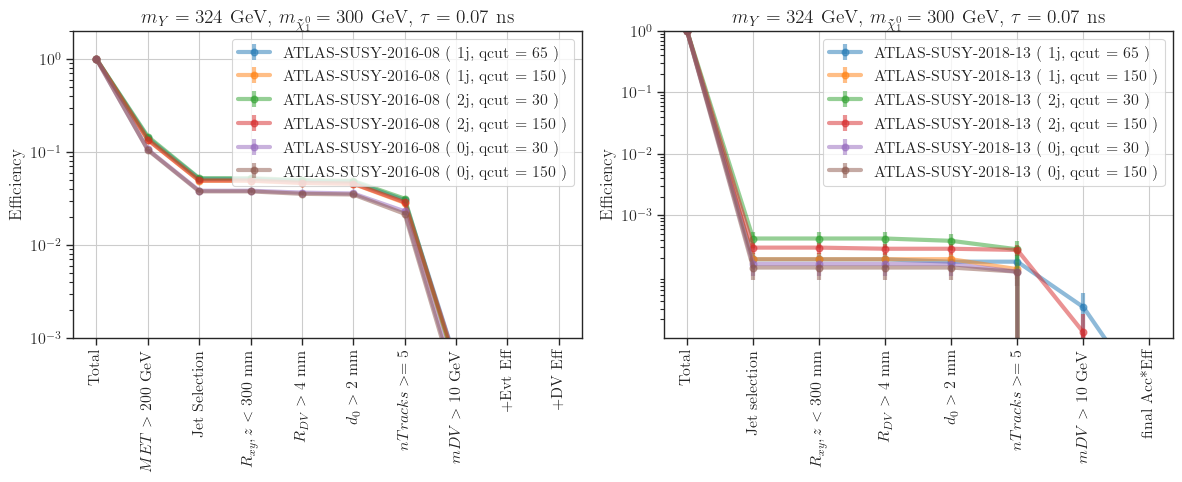

In [4]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(12,5))
# axarr = [axarr]

allContours = {}
for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    for clabel,recastData in recastDataDict[label].items():        
        x = np.arange(0.,len(recastData.columns),1.)
        x_ticks = [r'%s'%c for c in recastData.columns]
        ax.set_xticks(x, x_ticks,rotation='vertical')
        y = recastData.iloc[0][x_ticks]
        yerr = [v[1] for v in y]
        y = [v[0] for v in y[:]]
        ax.errorbar(x, y, yerr=yerr, fmt='-o',label=label+' ( %s ) '%clabel,linewidth=3,alpha=0.5)
        # p = ax.plot(x,y,label=label+' ( %s ) '%clabel,linewidth=3,alpha=0.5)
        
    ax.set_yscale('log')
    ax.set_ylabel('Efficiency')
    ax.set_title(title,fontsize=14)
    ax.legend()
    ax.set_ylim(1e-3,2.)
    ax.set_yticks([1e-3,1e-2,1e-1,1.])
    if '2018' in label:
        ax.set_ylim(1e-5,1)    
    ax.grid()
    

plt.tight_layout()
# plt.savefig('cutflows_ATLAS_%s.png' %figlabel)
plt.show()

/tmp/ipykernel_625912/2158194330.py:19: RuntimeWarning: invalid value encountered in divide
  ryerr = ry*np.sqrt((yerr/y)**2 + (y0err/y0)**2)
/tmp/ipykernel_625912/2158194330.py:19: RuntimeWarning: invalid value encountered in divide
  ryerr = ry*np.sqrt((yerr/y)**2 + (y0err/y0)**2)
/tmp/ipykernel_625912/2158194330.py:19: RuntimeWarning: invalid value encountered in divide
  ryerr = ry*np.sqrt((yerr/y)**2 + (y0err/y0)**2)
/tmp/ipykernel_625912/2158194330.py:19: RuntimeWarning: invalid value encountered in divide
  ryerr = ry*np.sqrt((yerr/y)**2 + (y0err/y0)**2)
/tmp/ipykernel_625912/2158194330.py:19: RuntimeWarning: invalid value encountered in divide
  ryerr = ry*np.sqrt((yerr/y)**2 + (y0err/y0)**2)


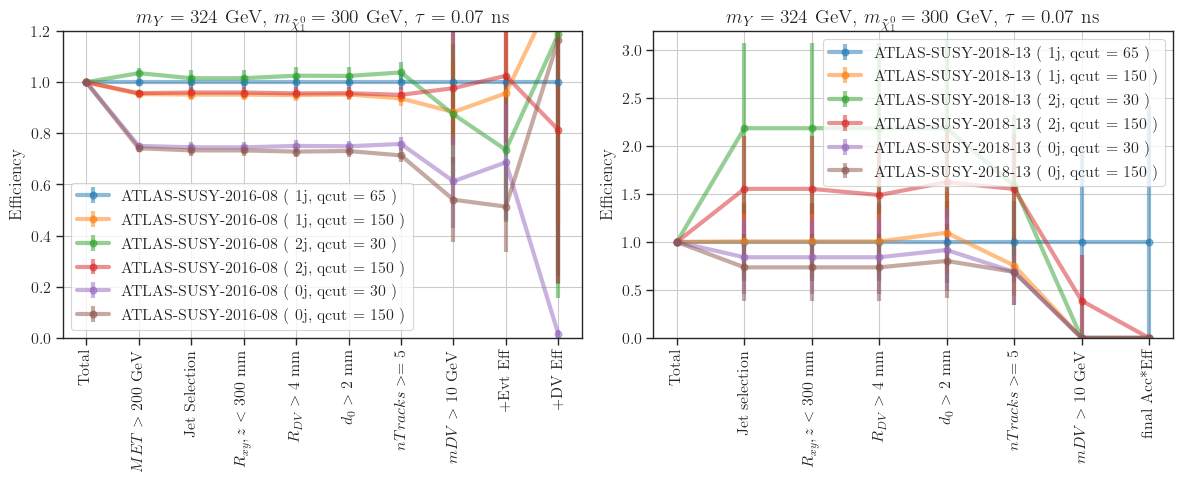

In [5]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(12,5))
# axarr = [axarr]

allContours = {}
for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    y0 = None
    for clabel,recastData in recastDataDict[label].items():        
        x = np.arange(0.,len(recastData.columns),1.)
        x_ticks = [r'%s'%c for c in recastData.columns]
        ax.set_xticks(x, x_ticks,rotation='vertical')
        y = recastData.iloc[0][x_ticks]
        yerr = np.array([v[1] for v in y])
        y = np.array([v[0] for v in y[:]])
        if y0 is None:
            y0 = np.copy(y)
            y0err = np.copy(yerr)
        ry = y/y0
        ryerr = ry*np.sqrt((yerr/y)**2 + (y0err/y0)**2)
        ax.errorbar(x, ry, yerr=ryerr, fmt='-o',label=label+' ( %s ) '%clabel,linewidth=3,alpha=0.5)
        # p = ax.plot(x,ry,label=label+' ( %s ) '%clabel,linewidth=3,alpha=0.5)
        
    # ax.set_yscale('log')
    ax.set_ylabel('Efficiency')
    ax.set_title(title,fontsize=14)
    ax.legend()
    ax.set_ylim(0.,1.2)
    if '2018' in label:
        ax.set_ylim(0.,3.2)
    # ax.set_yticks([1e-3,1e-2,1e-1,1.])
    ax.grid()
    

plt.tight_layout()
# plt.savefig('cutflows_ATLAS_%s.png' %figlabel)
plt.show()